In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, optimize

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline

In [3]:
def model(x, s, m):
    return stats.lognorm.pdf(x[:, 0], s=s, loc=0., scale=m)

In [4]:
X = np.logspace(-1, 2.5, 50, base=10).reshape(-1, 1)
y = model(X, 0.7, 17.)

In [5]:
popt, pcov = optimize.curve_fit(model, X, y)
popt, pcov

(array([ 0.7, 17. ]),
 array([[0., 0.],
        [0., 0.]]))

In [6]:
pipeline = Pipeline([
    ("transformer", FunctionTransformer(func=np.log, inverse_func=np.exp, validate=True)),
    ("polynomial", PolynomialFeatures(2)),
    (
        "regressor", TransformedTargetRegressor(
            regressor=LinearRegression(fit_intercept=False),
            func=np.log, inverse_func=np.exp
        )
    )
])

In [7]:
pipeline.fit(X, y)
pipeline.score(X, y)

1.0

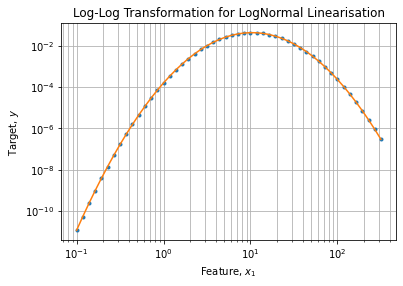

In [8]:
fig, axe = plt.subplots()
axe.loglog(X, y, linestyle="none", marker=".")
axe.loglog(X, pipeline.predict(X))
axe.set_title("Log-Log Transformation for LogNormal Linearisation")
axe.set_xlabel(r"Feature, $x_1$")
axe.set_ylabel(r"Target, $y$")
axe.grid(which="both")
axe.figure.savefig("figures/Linearizable/LogNormLinearization.pdf")

In [13]:
c, b, a = pipeline.steps[2][1].regressor_.coef_

In [14]:
pipeline.steps[2][1].regressor_.coef_

array([-8.75317977,  4.78206805, -1.02040816])

In [15]:
s = np.sqrt(-0.5/a)
m = np.exp(s**2*(b + 1))
s, m

(0.6999999999999998, 17.00000000000001)

In [20]:
-np.log(s*np.sqrt(2*np.pi)) - 1/(2*s**2)*np.log(m)**2

-8.753179765733506